# Analise da conta do Spotify

### Começaremos carregando o pacote 'RJSONIO' para podermos ler arquivos em .json

In [2]:
install.packages("RJSONIO")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [3]:
require(RJSONIO)

Loading required package: RJSONIO


In [7]:
json_file <- fromJSON("StreamingHistory.json")
json_file <- lapply(json_file, function(x) {
     x[sapply(x, is.null)] <- NA
     unlist(x)
})

In [14]:
spotify <-as.data.frame(do.call("cbind", json_file))
spotify

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V4414,V4415,V4416,V4417,V4418,V4419,V4420,V4421,V4422,V4423
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
endTime,2019-03-21 20:26,2019-03-23 01:31,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,2019-03-24 03:37,⋯,2019-06-22 19:01,2019-06-22 19:01,2019-06-22 19:02,2019-06-22 22:04,2019-06-22 22:08,2019-06-22 22:09,2019-06-22 22:09,2019-06-22 22:13,2019-06-22 22:17,2019-06-22 22:21
artistName,Spektrem,Cartoon,Alok,Arc North,Arc North,OneRepublic,Alok,Avicii,FTampa,FTampa,⋯,The Griswolds,The Griswolds,RAC,RAC,The Griswolds,Guillemots,The Griswolds,RAC,The Griswolds,Guillemots
trackName,Shine,On & On,Innocent (feat. Gavin James),Meant To Be,Meant To Be,Rich Love (with Seeb),Never Let Me Go,Levels - Radio Edit,Our Way,Our Way,⋯,16 Years,16 Years,The Beautiful Game,The Beautiful Game,16 Years,Trains To Brazil,16 Years,The Beautiful Game,16 Years,Trains To Brazil
msPlayed,282509,17902,0,1853,0,0,0,0,870,0,⋯,378,225699,51613,223625,225652,63233,576,261542,225699,242453


### Como o dataframe está muito grande na horizontal, e assim difícil de enxergar, vamos transpor os dados.
### Além disso iremos retirar as linhas em que consta 0 milisegundos tocados pois estas não são interessantes para a nossa análise

In [15]:
spotify <- t(spotify)
spotify <- as.data.frame(spotify)
spotify <-spotify[!(spotify$msPlayed==0),]
spotify

#### Abaixo transformaremos a coluna 'msPlayed', que no momento está classificada como 'factor' para 'numeric'

In [16]:
library(dplyr)
for(i in ncol(spotify)) {
  spotify[,i] <- as.numeric(as.character(spotify[,i]))
}

### Agora agruparemos todas as musicas iguais para termos um valor total

In [17]:
spotify <- spotify %>%
  group_by(artistName, trackName) %>%
  summarise_all(funs(time_played=sum(msPlayed, na.rm=TRUE)))

spotify <- spotify[,c(1,2,4)]
spotify$msPlayed_time_played <- spotify$msPlayed_time_played / 1000
spotify

artistName,trackName,msPlayed_time_played
<fct>,<fct>,<dbl>
5 Seconds of Summer,Don't Stop,645.586
5 Seconds of Summer,Heartbreak Girl,1991.652
5 Seconds of Summer,Youngblood,1423.919
A Hero for the World,We Are One (From “The Lion King II: Simba’s Pride”),8.518
Alan Walker,Alone,498.802
Alan Walker,Darkside,883.313
Alan Walker,Faded,1457.323
Alesso,I Wanna Know,241.623
Alice DJ,Better Off Alone,2045.849


In [19]:
library(ggplot2)

## Abaixo plotaremos o Top 5 cantores/bandas mais ouvidos na conta

Selecting by time


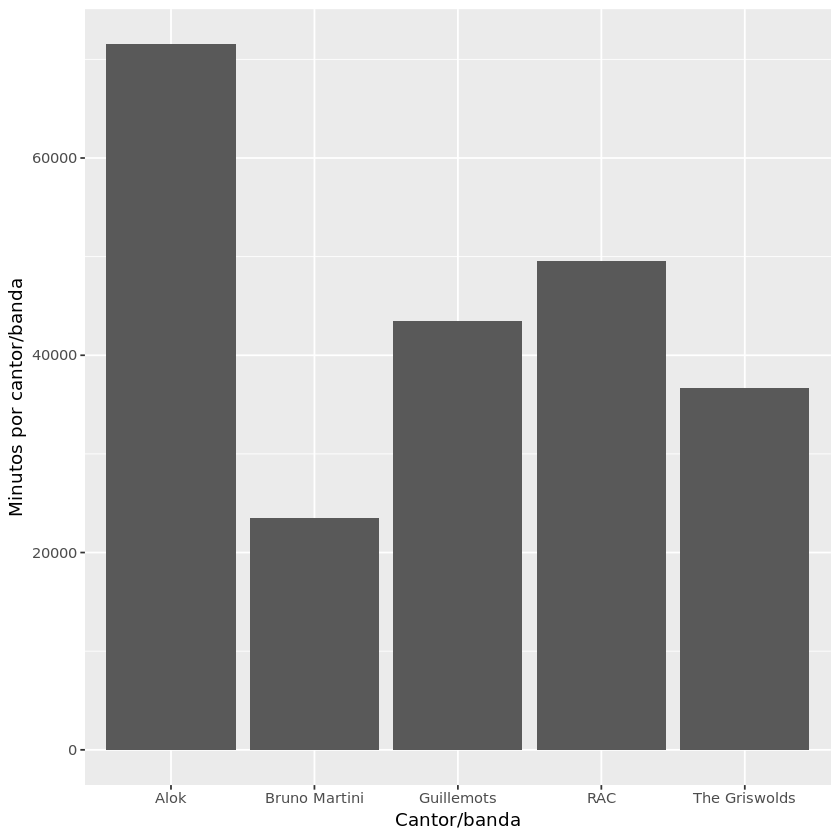

In [20]:
spotify %>% 
  count(artistName, msPlayed_time_played) %>%
  group_by(artistName) %>%
  summarise(time = sum(msPlayed_time_played)) %>%
  top_n(5) %>%
  ggplot(aes(x = artistName, y = time)) +
  geom_col() +
  labs(x = "Cantor/banda", y = "Minutos por cantor/banda")

## E por fim, o Top 10 músicas mais ouvidas na conta

Selecting by time


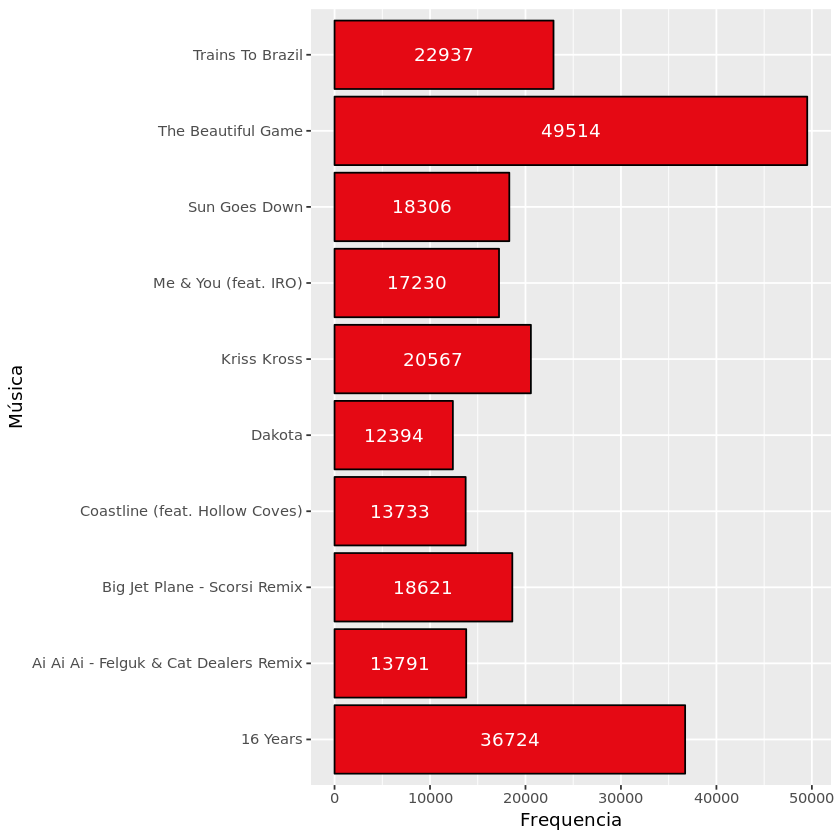

In [34]:
spotify %>% 
  count(trackName, msPlayed_time_played) %>%
  group_by(trackName) %>%
  summarise(time = round(sum(msPlayed_time_played))) %>%
  top_n(10) %>%
  ggplot(aes(x = trackName, y = time)) +
  geom_col(fill = "#e50914", color = "black") +
  geom_text(aes(label = time, y = time/2), color = "white") +
  labs(x = "Música", y = "Frequencia") +
  coord_flip()